In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
images = glob.glob('training_data/vehicles/*/*.png')
cars = []
for file in images:
    image = np.array(mpimg.imread(file)*255, dtype=np.uint8)
    cars.append(image)

images = glob.glob('training_data/non-vehicles/*/*.png')
notcars = []
for file in images:
    image = np.array(mpimg.imread(file)*255, dtype=np.uint8)
    notcars.append(image)
    
data_images = np.vstack((cars, notcars))     
data_labels = np.hstack((np.ones(len(cars)), np.zeros(len(notcars))))

print('Data set consists of {} cars and {} non-cars of size: {} and data type: {}.'.
      format(len(cars), len(notcars), data_images[0].shape, data_images[0].dtype))

# Save the dataset for later use
dist_pickle = {}
dist_pickle["images"] = data_images
dist_pickle["labels"] = data_labels
pickle.dump( dist_pickle, open( "training_data/dataset.p", "wb" ) )

Data set consists of 8792 cars and 8968 non-cars of size: (64, 64, 3) and data type: uint8.


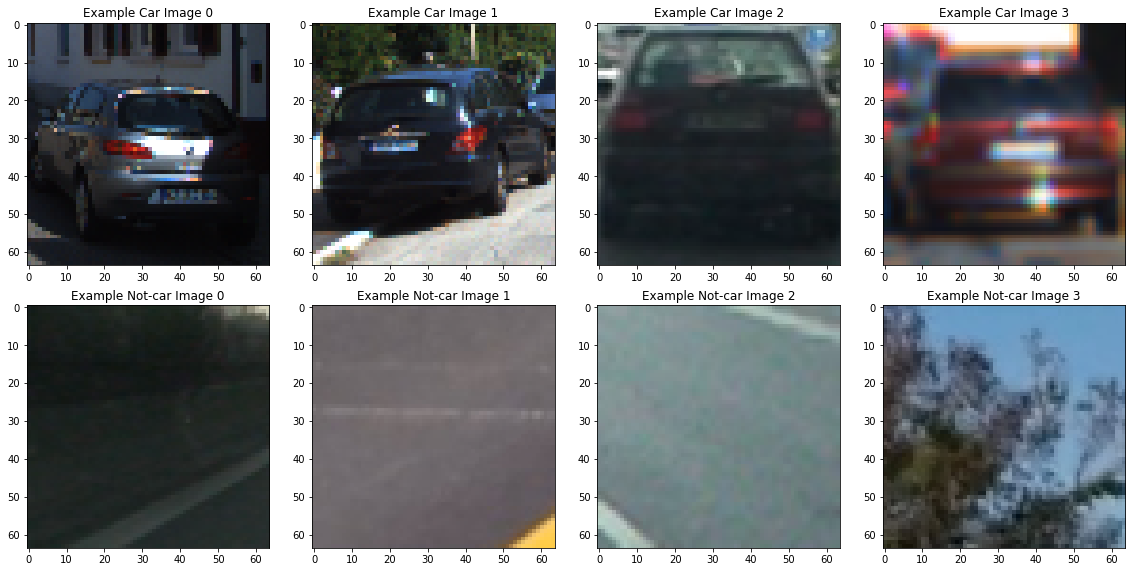

In [3]:
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars), size=4)
notcar_ind = np.random.randint(0, len(notcars), size=4)
    
# Read in car / not-car images
car_images = data_images[car_ind]
notcar_images = data_images[len(cars)+notcar_ind]

nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(16,8))
for idx, car_img, notcar_img in zip(range(4), car_images, notcar_images):
    plt.subplot(nrows,ncols, idx+1)
    plt.imshow(car_img)
    plt.title("Example Car Image {:d}".format(idx))
    plt.subplot(nrows,ncols, idx+1+ncols)
    plt.imshow(notcar_img)
    plt.title("Example Not-car Image {:d}".format(idx))
fig.tight_layout()
plt.show()